In [1]:
import pandas as pd
from prophet.plot import plot_plotly, plot_components_plotly
from prophet import Prophet

C:\Users\DELL\AppData\Roaming\Python\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import yfinance as yf

In [3]:
SOL_ticker=yf.Ticker("SOL-USD")

In [4]:
SOL=SOL_ticker.history(period="max")
SOL

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-04-10 00:00:00+00:00,0.832005,1.313487,0.694187,0.951054,87364276,0.0,0.0
2020-04-11 00:00:00+00:00,0.951054,1.049073,0.765020,0.776819,43862444,0.0,0.0
2020-04-12 00:00:00+00:00,0.785448,0.956670,0.762426,0.882507,38736897,0.0,0.0
2020-04-13 00:00:00+00:00,0.890760,0.891603,0.773976,0.777832,18211285,0.0,0.0
2020-04-14 00:00:00+00:00,0.777832,0.796472,0.628169,0.661925,16747614,0.0,0.0
...,...,...,...,...,...,...,...
2024-07-26 00:00:00+00:00,171.962570,183.538361,171.877899,183.136719,2816314095,0.0,0.0
2024-07-27 00:00:00+00:00,183.138092,188.140594,178.598358,184.085403,3248901126,0.0,0.0
2024-07-28 00:00:00+00:00,184.085999,186.514618,181.395340,184.886078,1852374783,0.0,0.0


In [5]:
SOL_reset = SOL.reset_index()
SOL_reset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1573 entries, 0 to 1572
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype              
---  ------        --------------  -----              
 0   Date          1573 non-null   datetime64[ns, UTC]
 1   Open          1573 non-null   float64            
 2   High          1573 non-null   float64            
 3   Low           1573 non-null   float64            
 4   Close         1573 non-null   float64            
 5   Volume        1573 non-null   int64              
 6   Dividends     1573 non-null   float64            
 7   Stock Splits  1573 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(6), int64(1)
memory usage: 98.4 KB


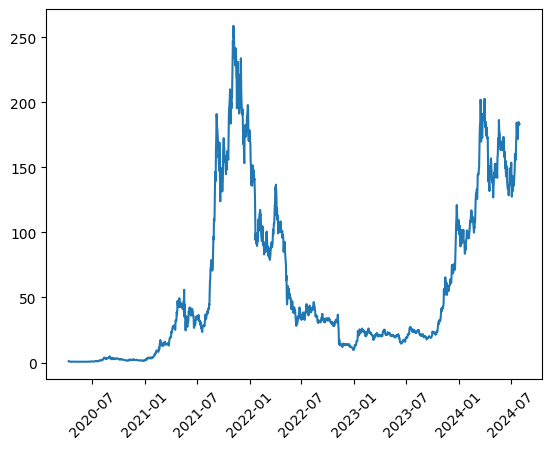

In [6]:
plt.plot(SOL_reset['Date'],SOL_reset['Close'])
plt.xticks(rotation=45)
plt.show()

In [7]:
SOL_reset.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True)
SOL_reset['ds'] = SOL_reset['ds'].dt.tz_localize(None)
SOL_final=SOL_reset[['ds','y']]
SOL_final.head()

,ds,y
0,2020-04-10,0.951054
1,2020-04-11,0.776819
2,2020-04-12,0.882507
3,2020-04-13,0.777832
4,2020-04-14,0.661925


In [8]:
SOL_train = SOL_reset.iloc[:len(SOL_reset)-365]
SOL_test = SOL_reset.iloc[len(SOL_reset)-365:]

In [9]:
model_p= Prophet()
# model_p.add_regressor('Volume')
model_p.fit(SOL_train)

14:00:01 - cmdstanpy - INFO - Chain [1] start processing
14:00:04 - cmdstanpy - INFO - Chain [1] done processing


In [10]:
future = model_p.make_future_dataframe(periods=365) #MS for monthly, H for hourly
forecast = model_p.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-04-10,1.511076,-5.746207,23.331050,1.511076,1.511076,7.620935,7.620935,7.620935,-0.239825,-0.239825,-0.239825,7.860760,7.860760,7.860760,0.0,0.0,0.0,9.132011
1,2020-04-11,1.617023,-6.076487,23.746136,1.617023,1.617023,8.024154,8.024154,8.024154,0.214001,0.214001,0.214001,7.810153,7.810153,7.810153,0.0,0.0,0.0,9.641177
2,2020-04-12,1.722969,-5.391887,25.360345,1.722969,1.722969,8.003333,8.003333,8.003333,0.270380,0.270380,0.270380,7.732953,7.732953,7.732953,0.0,0.0,0.0,9.726302
3,2020-04-13,1.828916,-4.887739,23.414260,1.828916,1.828916,7.480727,7.480727,7.480727,-0.152266,-0.152266,-0.152266,7.632993,7.632993,7.632993,0.0,0.0,0.0,9.309643
4,2020-04-14,1.934862,-5.358775,22.981883,1.934862,1.934862,7.264775,7.264775,7.264775,-0.249017,-0.249017,-0.249017,7.513792,7.513792,7.513792,0.0,0.0,0.0,9.199638


In [11]:
plot_plotly(model_p ,forecast)

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'marker': {'color': 'black', 'size': 4},
              'mode': 'markers',
              'name': 'Actual',
              'type': 'scatter',
              'x': array([datetime.datetime(2020, 4, 10, 0, 0),
                          datetime.datetime(2020, 4, 11, 0, 0),
                          datetime.datetime(2020, 4, 12, 0, 0), ...,
                          datetime.datetime(2023, 7, 29, 0, 0),
                          datetime.datetime(2023, 7, 30, 0, 0),
                          datetime.datetime(2023, 7, 31, 0, 0)], dtype=object),
              'y': array([ 0.95105398,  0.77681899,  0.88250703, ..., 25.16897392, 24.26101875,
                          23.7209568 ])},
             {'hoverinfo': 'skip',
              'line': {'width': 0},
              'mode': 'lines',
              'type': 'scatter',
              'x': array([datetime.datetime(2020, 4, 10, 0, 0),
                          datetime.datetime(2020, 4, 11, 0, 0),
                          datetime.datetime(2020, 4, 12, 0, 0), ...,
                          datetime.datetime(2024, 7, 28, 0, 0),
                          datetime.datetime(2024, 7, 29, 0, 0),
                          datetime.datetime(2024, 7, 30, 0, 0)], dtype=object),
              'y': array([  -5.74620663,   -6.07648722,   -5.39188728, ..., -131.58376466,
                          -141.84101495, -136.82066185])},
             {'fill': 'tonexty',
              'fillcolor': 'rgba(0, 114, 178, 0.2)',
              'line': {'color': '#0072B2', 'width': 2},
              'mode': 'lines',
              'name': 'Predicted',
              'type': 'scatter',
              'x': array([datetime.datetime(2020, 4, 10, 0, 0),
                          datetime.datetime(2020, 4, 11, 0, 0),
                          datetime.datetime(2020, 4, 12, 0, 0), ...,
                          datetime.datetime(2024, 7, 28, 0, 0),
                          datetime.datetime(2024, 7, 29, 0, 0),
                          datetime.datetime(2024, 7, 30, 0, 0)], dtype=object),
              'y': array([ 9.13201096,  9.64117686,  9.72630183, ..., 57.85285549, 57.28868262,
                          57.04384274])},
             {'fill': 'tonexty',
              'fillcolor': 'rgba(0, 114, 178, 0.2)',
              'hoverinfo': 'skip',
              'line': {'width': 0},
              'mode': 'lines',
              'type': 'scatter',
              'x': array([datetime.datetime(2020, 4, 10, 0, 0),
                          datetime.datetime(2020, 4, 11, 0, 0),
                          datetime.datetime(2020, 4, 12, 0, 0), ...,
                          datetime.datetime(2024, 7, 28, 0, 0),
                          datetime.datetime(2024, 7, 29, 0, 0),
                          datetime.datetime(2024, 7, 30, 0, 0)], dtype=object),
              'y': array([ 23.33105029,  23.74613639,  25.36034452, ..., 244.26629138,
                          243.9217312 , 246.4558376 ])}],
    'layout': {'height': 600,
               'showlegend': False,
               'template': '...',
               'width': 900,
               'xaxis': {'rangeselector': {'buttons': [{'count': 7, 'label': '1w', 'step': 'day', 'stepmode': 'backward'},
                                                       {'count': 1,
                                                        'label': '1m',
                                                        'step': 'month',
                                                        'stepmode': 'backward'},
                                                       {'count': 6,
                                                        'label': '6m',
                                                        'step': 'month',
                                                        'stepmode': 'backward'},
                                                       {'count': 1, 'label': '1y', 'step': 'year', 'stepmode': 'backward'},
                                                       {'step': 'all'}]},
              

In [12]:
plot_components_plotly(model_p, forecast)

C:\Users\DELL\AppData\Roaming\Python\Python311\site-packages\plotly\io\_json.py:560: UserWarning:

Discarding nonzero nanoseconds in conversion.



ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'line': {'color': '#0072B2', 'width': 2},
              'mode': 'lines',
              'name': 'trend',
              'type': 'scatter',
              'x': array([datetime.datetime(2020, 4, 10, 0, 0),
                          datetime.datetime(2020, 4, 11, 0, 0),
                          datetime.datetime(2020, 4, 12, 0, 0), ...,
                          datetime.datetime(2024, 7, 28, 0, 0),
                          datetime.datetime(2024, 7, 29, 0, 0),
                          datetime.datetime(2024, 7, 30, 0, 0)], dtype=object),
              'xaxis': 'x',
              'y': array([ 1.51107599,  1.61702261,  1.72296923, ..., 70.13918976, 70.23779973,
                          70.3364097 ]),
              'yaxis': 'y'},
             {'line': {'color': 'rgba(0, 114, 178, 0.2)', 'width': 0},
              'mode': 'lines',
              'name': 'trend_upper',
              'type': 'scatter',
              'x': array([datetime.datetime(2020, 4, 10, 0, 0),
                          datetime.datetime(2020, 4, 11, 0, 0),
                          datetime.datetime(2020, 4, 12, 0, 0), ...,
                          datetime.datetime(2024, 7, 28, 0, 0),
                          datetime.datetime(2024, 7, 29, 0, 0),
                          datetime.datetime(2024, 7, 30, 0, 0)], dtype=object),
              'xaxis': 'x',
              'y': array([  1.51107599,   1.61702261,   1.72296923, ..., 258.20212108,
                          258.2531961 , 258.30861202]),
              'yaxis': 'y'},
             {'fill': 'tonexty',
              'fillcolor': 'rgba(0, 114, 178, 0.2)',
              'line': {'color': 'rgba(0, 114, 178, 0.2)', 'width': 0},
              'mode': 'lines',
              'name': 'trend_lower',
              'type': 'scatter',
              'x': array([datetime.datetime(2020, 4, 10, 0, 0),
                          datetime.datetime(2020, 4, 11, 0, 0),
                          datetime.datetime(2020, 4, 12, 0, 0), ...,
                          datetime.datetime(2024, 7, 28, 0, 0),
                          datetime.datetime(2024, 7, 29, 0, 0),
                          datetime.datetime(2024, 7, 30, 0, 0)], dtype=object),
              'xaxis': 'x',
              'y': array([   1.51107599,    1.61702261,    1.72296923, ..., -121.45715687,
                          -122.16754522, -122.87793357]),
              'yaxis': 'y'},
             {'line': {'color': '#0072B2', 'width': 2},
              'mode': 'lines',
              'name': 'yearly',
              'type': 'scatter',
              'x': array([datetime.datetime(2017, 1, 1, 0, 0),
                          datetime.datetime(2017, 1, 2, 0, 0, 59, 178082),
                          datetime.datetime(2017, 1, 3, 0, 1, 58, 356164), ...,
                          datetime.datetime(2017, 12, 29, 5, 57, 2, 465753),
                          datetime.datetime(2017, 12, 30, 5, 58, 1, 643835),
                          datetime.datetime(2017, 12, 31, 5, 59, 0, 821917)], dtype=object),
              'xaxis': 'x2',
              'y': array([5.78129984, 5.57260936, 5.31062241, ..., 6.12534507, 6.0530977 ,
                          5.94005994]),
              'yaxis': 'y2'},
             {'line': {'color': '#0072B2', 'width': 2},
              'mode': 'lines',
              'name': 'weekly',
              'type': 'scatter',
              'x': array([datetime.datetime(2017, 1, 1, 0, 0),
                          datetime.datetime(2017, 1, 2, 0, 0),
                          datetime.datetime(2017, 1, 3, 0, 0),
                          datetime.datetime(2017, 1, 4, 0, 0),
                          datetime.datetime(2017, 1, 5, 0, 0),
                          datetime.datetime(2017, 1, 6, 0, 0),
                          datetime.datetime(2017, 1, 7, 0, 0)], dtype=object),
              'xaxis': 'x3',
              'y': array([ 0.27037952, -0.15226625, -0.24901676,  0.11754894,  0.03917832,
                          -0.23982476,  0.21400099]),
     

In [13]:
from statsmodels.tools.eval_measures import rmse

In [14]:
predictions = forecast.iloc[-365:]['yhat']

In [15]:
print("Root Mean Squared Error between actual and  predicted values: ",rmse(predictions,SOL_test['y']))
print("Mean Value of Test Dataset:", SOL_test['y'].mean())

Root Mean Squared Error between actual and  predicted values:  70.81443620826923
Mean Value of Test Dataset: 99.50233578616626


In [16]:
from sklearn.metrics import r2_score

r2 = r2_score(SOL_test.y, predictions)
print("R-squared:", r2)

R-squared: -0.5128007487502306
